In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as tck
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
import numpy as np
import re

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
experiment = 'MAPP'

In [3]:
input_file_filtered = '../MetaMSF/output/MAPP/Canonical/IMP_filtered.csv'
input_file_validation = '../MetaMSF/output/MAPP/MAPP_Groupspecific_fdr1/IMP_scan_validation.csv'

In [4]:
##################################### IMP_filtered ####################################################

In [5]:
data = pd.read_csv(input_file_filtered, sep=',', engine='python')

In [6]:
pattern = r'^(Sequence|CDS|nuORFs)$|^(Delta score|Hyperscore|PeptideProphet|Expectation)'
columns = [x for x in data.columns if re.search(pattern, x)]
data = data[columns]
data.head()

,Sequence,CDS,nuORFs,Delta score KO1 1 HLA-I,Delta score KO1 2 HLA-I,Delta score KO1 3 HLA-I,Delta score KO2 1 HLA-I,Delta score KO2 2 HLA-I,Delta score KO2 3 HLA-I,Delta score WT1 1 HLA-I,...,PeptideProphet KO1 2 HLA-I,PeptideProphet KO1 3 HLA-I,PeptideProphet KO2 1 HLA-I,PeptideProphet KO2 2 HLA-I,PeptideProphet KO2 3 HLA-I,PeptideProphet WT1 1 HLA-I,PeptideProphet WT1 3 HLA-I,PeptideProphet WT5 1 HLA-I,PeptideProphet WT5 2 HLA-I,PeptideProphet WT5 3 HLA-I
0,AAAAAAAAAAAAAAANMYSSAGAAPPGSYDYC,AAAAAAAAAAAAAAANMYSSAGAAPPGSYDYC_462/495:ENSP0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7139,NaN,NaN
1,AAAAAAAAATN,"AAAAAAAAATN_2/327:ENSP00000304102.3,AAAAAAAAAT...",AAAAAAAAATN_8/78:ENST00000465027.1_1_7:9968659...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8689,0.9187,NaN
2,AAAAAAAAATNGTGGSSGMEVD,AAAAAAAAATNGTGGSSGMEVD_2/327:ENSP00000304102.3...,AAAAAAAAATNGTGGSSGMEVD_8/78:ENST00000465027.1_...,25.571,NaN,26.392,19.76,NaN,NaN,NaN,...,NaN,1.0,0.9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAAAAAVPPPHPAAAAAAAAAAAAAAAAAVPPPHPNIRAL,AAAAAAAAVPPPHPAAAAAAAAAAAAAAAAAVPPPHPNIRAL_52/...,NaN,NaN,NaN,NaN,NaN,1.078,NaN,NaN,...,NaN,NaN,NaN,0.6411,NaN,NaN,NaN,NaN,NaN,NaN
4,AAAAAAGAGPEMVRG,"AAAAAAGAGPEMVRG_2/360:ENSP00000215832.7,AAAAAA...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.974,...,NaN,NaN,NaN,NaN,NaN,0.9601,NaN,NaN,0.9992,NaN


In [7]:
replicas = [re.sub('^Hyperscore +', '', x) for x in data.columns if re.search('^Hyperscore', x)]
replicas

['KO1 1 HLA-I',
 'KO1 2 HLA-I',
 'KO1 3 HLA-I',
 'KO2 1 HLA-I',
 'KO2 2 HLA-I',
 'KO2 3 HLA-I',
 'WT1 1 HLA-I',
 'WT1 3 HLA-I',
 'WT5 1 HLA-I',
 'WT5 2 HLA-I',
 'WT5 3 HLA-I']

In [8]:
data_tr = []
for rep in replicas:
    pattern = '^(Sequence|CDS|nuORFs)$|' + rep
    columns = [x for x in data.columns if re.search(pattern, x)]
    data_rep = data[columns].copy()
    data_rep.columns = data_rep.columns.str.replace(rep, '').str.rstrip()
    data_rep['Sample'] = rep
    data_rep = data_rep[data_rep['Hyperscore'].notna()]
    data_tr.append(data_rep)
data_tr = pd.concat(data_tr)

In [9]:
data_corr = data_tr[['Delta score', 'Expectation', 'Hyperscore', 'PeptideProphet']]
data_corr.head()

,Delta score,Expectation,Hyperscore,PeptideProphet
2,25.571,1.177000e-06,35.905,0.9992
5,45.344,1.300000e-07,63.923,0.9999
6,25.948,9.777000e-05,37.249,0.9995
7,9.131,5.461000e-02,30.320,0.7805
8,5.990,3.121000e-02,16.582,0.9816


In [10]:
data_corr.corr('pearson')

,Delta score,Expectation,Hyperscore,PeptideProphet
Delta score,1.000000,-0.282553,0.938560,0.209792
Expectation,-0.282553,1.000000,-0.320951,-0.377368
Hyperscore,0.938560,-0.320951,1.000000,0.218600
PeptideProphet,0.209792,-0.377368,0.218600,1.000000


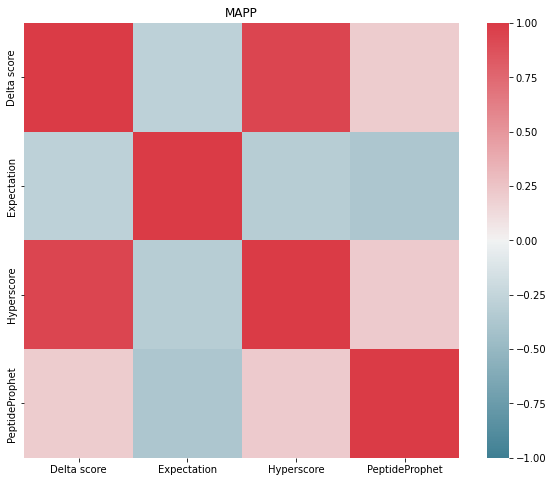

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_corr.corr()
p = sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
t = ax.set_title(experiment)

In [12]:
p.figure.savefig('output/' + experiment + '.MSFragger.pearson_correlation.png', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')
p.figure.savefig('output/' + experiment + '.MSFragger.pearson_correlation.pdf', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')

In [13]:
##################################### IMP_scan_validation ##############################################

In [14]:
data = pd.read_csv(input_file_validation, sep=',', engine='python')

In [15]:
pattern = r'^(Sequence|CDS|nuORFs)$|^(Delta score|Hyperscore|PeptideProphet|Expectation)'
columns = [x for x in data.columns if re.search(pattern, x)]
data = data[columns]
data[['CDS', 'nuORFs']] = data[['CDS', 'nuORFs']].astype(str)
data.head()

,Sequence,CDS,nuORFs,Delta score KO1 1 HLA-I,Delta score KO1 2 HLA-I,Delta score KO1 3 HLA-I,Delta score KO2 1 HLA-I,Delta score KO2 2 HLA-I,Delta score KO2 3 HLA-I,Delta score WT1 1 HLA-I,...,PeptideProphet KO1 2 HLA-I,PeptideProphet KO1 3 HLA-I,PeptideProphet KO2 1 HLA-I,PeptideProphet KO2 2 HLA-I,PeptideProphet KO2 3 HLA-I,PeptideProphet WT1 1 HLA-I,PeptideProphet WT1 3 HLA-I,PeptideProphet WT5 1 HLA-I,PeptideProphet WT5 2 HLA-I,PeptideProphet WT5 3 HLA-I
0,AADFEIGHLF,nan,nan,14.987,13.322,NaN,NaN,NaN,NaN,NaN,...,0.9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAFPRPPAARAH,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9715,NaN
2,ALPGGREPRAGRLRLLPRLRQAAGRAVHR,nan,nan,NaN,NaN,NaN,NaN,NaN,8.996,NaN,...,NaN,NaN,NaN,NaN,0.9709,NaN,NaN,NaN,NaN,NaN
3,ATVEPETTPTPNPPTTEKEKTESNQEVANPEHYIKHPLQNRW,nan,ATVEPETTPTPNPPTTEKEKTESNQEVANPEHYIKHPLQNRW_2/2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9998,NaN,NaN
4,DLEPGTTDSIRSGPFGQIYRPDNFVFGQSGAGNNW,nan,DLEPGTTDSIRSGPFGQIYRPDNFVFGQSGAGNNW_64/229:ENS...,NaN,NaN,NaN,NaN,NaN,32.017,NaN,...,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN


In [16]:
replicas = [re.sub('^Hyperscore +', '', x) for x in data.columns if re.search('^Hyperscore', x)]
data_tr = []
for rep in replicas:
    pattern = '^(Sequence|CDS|nuORFs)$|' + rep
    columns = [x for x in data.columns if re.search(pattern, x)]
    data_rep = data[columns].copy()
    data_rep.columns = data_rep.columns.str.replace(rep, '').str.rstrip()
    data_rep['Sample'] = rep
    data_rep = data_rep[data_rep['Hyperscore'].notna()]
    data_tr.append(data_rep)
data_tr = pd.concat(data_tr)

In [17]:
data_tr['Type'] = data_tr['Sample'].apply(lambda x: 'ko' if re.search('KO|ko', x) else 'wt' if re.search('WT|wt', x) else 'NA')
list(data_tr['Type'].unique())

['ko', 'wt']

In [18]:
data_tr.head()

,Sequence,CDS,nuORFs,Delta score,Expectation,Hyperscore,PeptideProphet,Sample,Type
0,AADFEIGHLF,nan,nan,14.987,8.711000e-06,27.835,1.0000,KO1 1 HLA-I,ko
5,DLEPGTTDSIRSGPFGQIYRPDNFVFGQSGAGNNWAKGH,nan,DLEPGTTDSIRSGPFGQIYRPDNFVFGQSGAGNNWAKGH_64/229...,11.189,2.228000e-02,25.801,0.9960,KO1 1 HLA-I,ko
6,DLEPGTTDSIRSGPFGQIYRPDNFVFGQSGAGNNWAKGHYTE,nan,DLEPGTTDSIRSGPFGQIYRPDNFVFGQSGAGNNWAKGHYTE_64/...,40.476,9.730000e-12,55.292,1.0000,KO1 1 HLA-I,ko
18,GWNEGRPYLFSQ,nan,nan,17.050,2.109000e-04,30.851,0.9997,KO1 1 HLA-I,ko
19,HDNFGIVKGLMTTVH,nan,HDNFGIVKGLMTTVH_70/175:ENST00000638093.1_1_6:1...,15.893,3.187000e-06,25.961,0.9817,KO1 1 HLA-I,ko


In [19]:
data_tr['Category'] = data_tr.apply(lambda x: 'Canonical' if x['CDS'] != 'nan' else ('nuORF' if x['nuORFs'] != 'nan' else 'ProxyPhe'), axis=1)
list(data_tr['Category'].unique())

['ProxyPhe', 'nuORF', 'Canonical']

In [20]:
data_types = data_tr[['Sequence', 'Category', 'Type']].groupby(['Sequence']).agg(set).reset_index()
data_types['Category'] = data_types['Category'].apply(lambda x: ','.join(sorted(x)))
data_types['Type'] = data_types['Type'].apply(lambda x: ','.join(sorted(x)))
data_types['Type'] = data_types['Type'].apply(lambda x: 'shared' if x == 'ko,wt' else x)
data_types.head()

,Sequence,Category,Type
0,AAAAAAGAGPEMVRG,Canonical,wt
1,AAAAAAGAGPEMVRGQVFDVGPRYTNL,Canonical,shared
2,AAAAAAGSGTPRE,Canonical,shared
3,AAAAAAVAVSSPFSLRTAPAATLFQTSALPPA,Canonical,ko
4,AAAAAAYLGAPPPPPPPGAAAGPFLQ,Canonical,ko


In [21]:
list(data_types['Category'].unique())

['Canonical', 'ProxyPhe', 'nuORF']

In [22]:
data_structure = data_types.groupby(['Category', 'Type']).count().reset_index()
data_structure.head()

,Category,Type,Sequence
0,Canonical,ko,3022
1,Canonical,shared,5847
2,Canonical,wt,1953
3,ProxyPhe,ko,5
4,ProxyPhe,shared,2


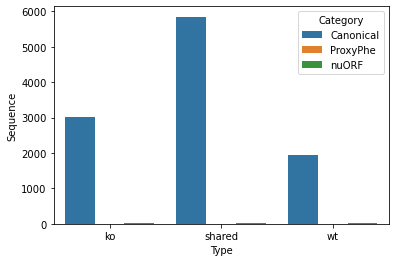

In [23]:
p = sns.barplot(x='Type',y='Sequence',data=data_structure,hue='Category',errorbar=('ci', 0))

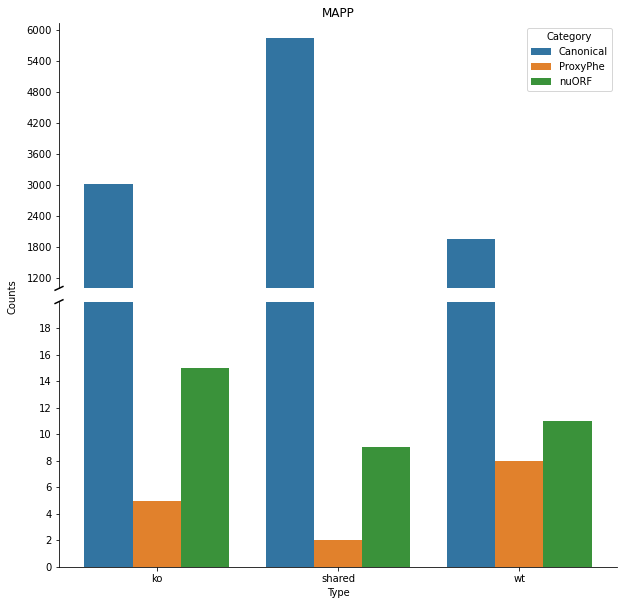

In [24]:
f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, figsize=(10,10), sharex=False, gridspec_kw={'hspace':0.05})

sns.barplot(x="Type", y="Sequence", data=data_structure, hue='Category', errorbar=('ci', 0), ax=ax_top)
sns.barplot(x="Type", y="Sequence", data=data_structure ,hue='Category', errorbar=('ci', 0), ax=ax_bottom)

# those limits are fake
ax_top.set_ylim(bottom=1000)
ax_top.yaxis.set_major_locator(MaxNLocator(prune='lower'))
ax_top.axes.set_title(experiment)

ax_bottom.set_ylim(0, 20)
ax_bottom.yaxis.set_major_locator(MaxNLocator(integer=True))
ax_bottom.yaxis.set_major_locator(MaxNLocator(prune='upper'))

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

d = .007  # how big to make the diagonal lines in axes coordinates

# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs.update(transform=ax_bottom.transAxes)  # switch to the bottom axes
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

#remove one of the legend and x label
ax_bottom.legend().remove()
ax_bottom.set_ylabel('')
ax_top.set_xticks([])
ax_top.set_ylabel('')
ax_top.set_xlabel('')
plt.gcf().text(0.06,0.5, "Counts", ha="center", va="center", rotation=90)

plt.savefig('output/' + experiment + '.MSFragger.peptide_counts.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig('output/' + experiment + '.MSFragger.peptide_counts.pdf', dpi=600, facecolor='white', bbox_inches='tight')

plt.show()

In [25]:
data_tr_best = data_tr[['Sequence', 'Hyperscore']].groupby(['Sequence']).max().reset_index()
data_tr_best.head()

,Sequence,Hyperscore
0,AAAAAAGAGPEMVRG,30.828
1,AAAAAAGAGPEMVRGQVFDVGPRYTNL,63.923
2,AAAAAAGSGTPRE,42.175
3,AAAAAAVAVSSPFSLRTAPAATLFQTSALPPA,24.660
4,AAAAAAYLGAPPPPPPPGAAAGPFLQ,30.320


In [26]:
data_values = pd.merge(data_tr, data_tr_best, on=['Sequence', 'Hyperscore'], how='inner')
data_values.head()

,Sequence,CDS,nuORFs,Delta score,Expectation,Hyperscore,PeptideProphet,Sample,Type,Category
0,AADFEIGHLF,nan,nan,14.987,0.000009,27.835,1.0000,KO1 1 HLA-I,ko,ProxyPhe
1,DLEPGTTDSIRSGPFGQIYRPDNFVFGQSGAGNNWAKGH,nan,DLEPGTTDSIRSGPFGQIYRPDNFVFGQSGAGNNWAKGH_64/229...,11.189,0.022280,25.801,0.9960,KO1 1 HLA-I,ko,nuORF
2,HDNFGIVKGLMTTVH,nan,HDNFGIVKGLMTTVH_70/175:ENST00000638093.1_1_6:1...,15.893,0.000003,25.961,0.9817,KO1 1 HLA-I,ko,nuORF
3,KEKTESNQEVANPEHYIKHPLQNRW,nan,KEKTESNQEVANPEHYIKHPLQNRW_19/217:ENST000004228...,24.941,0.000004,39.588,0.9977,KO1 1 HLA-I,ko,nuORF
4,KGTDTVAGLALNKKYYGTKDPVPGYSVPAAEH,nan,KGTDTVAGLALNKKYYGTKDPVPGYSVPAAEH_165/440:ENST0...,0.281,0.000836,36.354,0.9955,KO1 1 HLA-I,ko,nuORF


In [27]:
#data_values1 = data_tr[['Sequence', 'Hyperscore', 'Delta score', 'PeptideProphet']].groupby(['Sequence']).max().reset_index()
#data_values2 = data_tr[['Sequence', 'Expectation']].groupby(['Sequence']).min().reset_index()
#data_values = pd.merge(data_values1, data_values2, on=['Sequence'], how='inner')
data_values = data_values.drop(columns=['Type', 'Category'])

In [28]:
data2plot = pd.merge(data_types, data_values, on=['Sequence'], how='inner')
data2plot['1-PeptideProphet'] = data2plot['PeptideProphet'].apply(lambda x: 1 - x)
data2plot.head()

,Sequence,Category,Type,CDS,nuORFs,Delta score,Expectation,Hyperscore,PeptideProphet,Sample,1-PeptideProphet
0,AAAAAAGAGPEMVRG,Canonical,wt,"AAAAAAGAGPEMVRG_2/360:ENSP00000215832.7,AAAAAA...",nan,3.293,0.001818,30.828,0.9732,WT1 1 HLA-I,0.0268
1,AAAAAAGAGPEMVRGQVFDVGPRYTNL,Canonical,shared,AAAAAAGAGPEMVRGQVFDVGPRYTNL_2/360:ENSP00000215...,nan,34.291,0.000001,63.923,0.9999,KO1 1 HLA-I,0.0001
2,AAAAAAGSGTPRE,Canonical,shared,AAAAAAGSGTPRE_2/117:ENSP00000420176.1,nan,24.564,0.000005,42.175,0.9996,WT1 1 HLA-I,0.0004
3,AAAAAAVAVSSPFSLRTAPAATLFQTSALPPA,Canonical,ko,AAAAAAVAVSSPFSLRTAPAATLFQTSALPPA_343/395:ENSP0...,nan,4.533,0.118000,24.660,0.5990,KO2 1 HLA-I,0.4010
4,AAAAAAYLGAPPPPPPPGAAAGPFLQ,Canonical,ko,AAAAAAYLGAPPPPPPPGAAAGPFLQ_69/420:ENSP00000478...,nan,2.529,0.067000,30.320,0.8217,KO1 1 HLA-I,0.1783


In [29]:
################### Hyperscore VS Expectation ###################

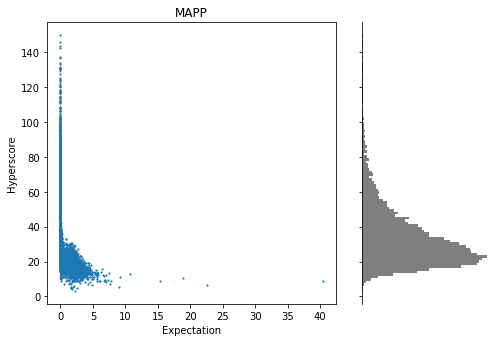

In [30]:
x = data2plot['Expectation']
y = data2plot['Hyperscore']

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
#ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)
    
ax_main.scatter(x, y, s=5, marker='.', color='tab:blue')
ax_main.set(xlabel='Expectation', ylabel='Hyperscore')
ax_main.axes.set_title(experiment)

#ax_xDist.hist(x, bins=100, align='mid')
## Hide X and Y axes ticks and labels marks
#ax_xDist.xaxis.set_tick_params(labelbottom=False)
#ax_xDist.yaxis.set_tick_params(labelleft=False)
#ax_xDist.set_yticks([])
#ax_xDist.spines["right"].set_visible(False)
#x_xDist.spines["top"].set_visible(False)
#x_xDist.spines["left"].set_visible(False)
#ax_xDist.set(ylabel='count')

ax_yDist.hist(y, bins=100, orientation='horizontal', align='mid', color='tab:grey')
# Hide X and Y axes ticks and labels marks
ax_yDist.xaxis.set_tick_params(labelbottom=False)
ax_yDist.yaxis.set_tick_params(labelleft=False)
ax_yDist.set_xticks([])
ax_yDist.spines["right"].set_visible(False)
ax_yDist.spines["top"].set_visible(False)
ax_yDist.spines["bottom"].set_visible(False)
#ax_yDist.set(xlabel='count')

plt.savefig('output/' + experiment + '.MSFragger.hyperscore_expectation.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig('output/' + experiment + '.MSFragger.hyperscore_expectation.pdf', dpi=600, facecolor='white', bbox_inches='tight')

plt.show()

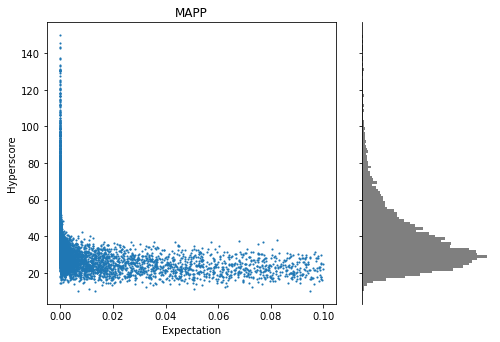

In [31]:
data2plot_filtered = data2plot[data2plot['Expectation'] < 0.1]

x = data2plot_filtered['Expectation']
y = data2plot_filtered['Hyperscore']

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
#ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)
    
ax_main.scatter(x, y, s=5, marker='.', color='tab:blue')
ax_main.set(xlabel='Expectation', ylabel='Hyperscore')
ax_main.axes.set_title(experiment)

#ax_xDist.hist(x, bins=100, align='mid')
## Hide X and Y axes ticks and labels marks
#ax_xDist.xaxis.set_tick_params(labelbottom=False)
#ax_xDist.yaxis.set_tick_params(labelleft=False)
#ax_xDist.set_yticks([])
#ax_xDist.spines["right"].set_visible(False)
#x_xDist.spines["top"].set_visible(False)
#x_xDist.spines["left"].set_visible(False)
#ax_xDist.set(ylabel='count')

ax_yDist.hist(y, bins=100, orientation='horizontal', align='mid', color='tab:grey')
# Hide X and Y axes ticks and labels marks
ax_yDist.xaxis.set_tick_params(labelbottom=False)
ax_yDist.yaxis.set_tick_params(labelleft=False)
ax_yDist.set_xticks([])
ax_yDist.spines["right"].set_visible(False)
ax_yDist.spines["top"].set_visible(False)
ax_yDist.spines["bottom"].set_visible(False)
#ax_yDist.set(xlabel='count')

plt.savefig('output/' + experiment + '.MSFragger.hyperscore_expectation(less0.1).png', dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig('output/' + experiment + '.MSFragger.hyperscore_expectation(less0.1).pdf', dpi=600, facecolor='white', bbox_inches='tight')

plt.show()

In [32]:
################### Hyperscore VS PeptideProphet ###################

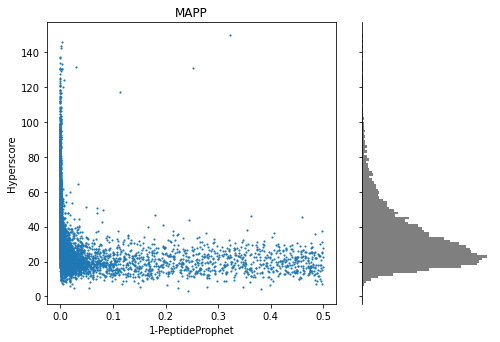

In [33]:
x = data2plot['1-PeptideProphet']
y = data2plot['Hyperscore']

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
#ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)
    
ax_main.scatter(x, y, s=5, marker='.', color='tab:blue')
ax_main.set(xlabel='1-PeptideProphet', ylabel='Hyperscore')
ax_main.axes.set_title(experiment)

#ax_xDist.hist(x, bins=100, align='mid')
## Hide X and Y axes ticks and labels marks
#ax_xDist.xaxis.set_tick_params(labelbottom=False)
#ax_xDist.yaxis.set_tick_params(labelleft=False)
#ax_xDist.set_yticks([])
#ax_xDist.spines["right"].set_visible(False)
#x_xDist.spines["top"].set_visible(False)
#x_xDist.spines["left"].set_visible(False)
#ax_xDist.set(ylabel='count')

ax_yDist.hist(y, bins=100, orientation='horizontal', align='mid', color='tab:grey')
# Hide X and Y axes ticks and labels marks
ax_yDist.xaxis.set_tick_params(labelbottom=False)
ax_yDist.yaxis.set_tick_params(labelleft=False)
ax_yDist.set_xticks([])
ax_yDist.spines["right"].set_visible(False)
ax_yDist.spines["top"].set_visible(False)
ax_yDist.spines["bottom"].set_visible(False)
#ax_yDist.set(xlabel='count')

plt.savefig('output/' + experiment + '.MSFragger.hyperscore_peptideProphet.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig('output/' + experiment + '.MSFragger.hyperscore_peptideProphet.pdf', dpi=600, facecolor='white', bbox_inches='tight')

plt.show()

In [34]:
################### Hyperscore VS Delta score ###################

In [35]:
heavy_peptide_data = {
    'Delta mass': [0.0011], 
    'SpectralSim': [0.9514],
    'RTScore': [0.2488],
    'Expectation': [0.01117],
    'Hyperscore': [23.591],
    'Nextscore': [12.517],
    'PeptideProphet': [0.997]
}
data_hp = pd.DataFrame(heavy_peptide_data)
data_hp['Delta score'] = data_hp.apply(lambda x: x['Hyperscore'] - x['Nextscore'], axis=1)
data_hp.head()

,Delta mass,SpectralSim,RTScore,Expectation,Hyperscore,Nextscore,PeptideProphet,Delta score
0,0.0011,0.9514,0.2488,0.01117,23.591,12.517,0.997,11.074


In [36]:
# Thresholds for Hyperscore and Deltascore
thr_hs, thr_delta = (20, 4)

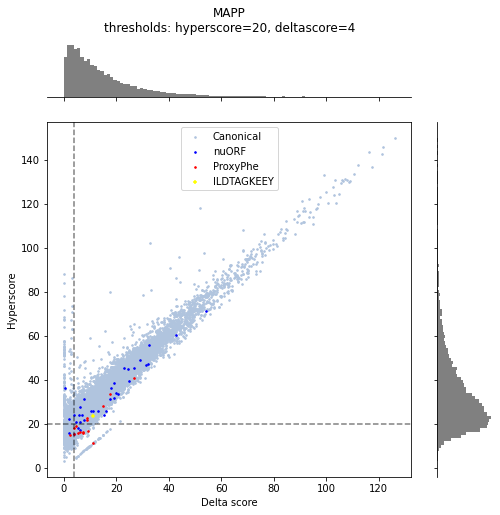

In [37]:
data2plot_canonical = data2plot[data2plot['Category'] == 'Canonical']
data2plot_nuorf = data2plot[data2plot['Category'] == 'nuORF']
data2plot_proxy = data2plot[data2plot['Category'] == 'ProxyPhe']
data2plot_heavy = data_hp

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3, width_ratios=[3,3,1], height_ratios=[1,3,3])
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(
    data2plot_canonical['Delta score'], 
    data2plot_canonical['Hyperscore'], 
    s=10, c='lightsteelblue', marker='.', label='Canonical'
)
ax_main.scatter(
    data2plot_nuorf['Delta score'], 
    data2plot_nuorf['Hyperscore'], 
    s=10, c='blue', marker='.', label='nuORF'
)
ax_main.scatter(
    data2plot_proxy['Delta score'], 
    data2plot_proxy['Hyperscore'], 
    s=10, c='red', marker='.', label='ProxyPhe'
)
ax_main.scatter(
    data2plot_heavy['Delta score'], 
    data2plot_heavy['Hyperscore'], 
    s=20, c='yellow', marker='+', label='ILDTAGKEEY'
)

ax_main.axvline(thr_delta, c='black', linestyle='dashed', alpha=0.5)
ax_main.axhline(thr_hs, c='black', linestyle='dashed', alpha=0.5)

ax_main.set(xlabel='Delta score', ylabel='Hyperscore')
ax_main.legend(loc='upper center')

ax_xDist.hist(data2plot['Delta score'], bins=100, align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_xDist.xaxis.set_tick_params(labelbottom=False)
ax_xDist.yaxis.set_tick_params(labelleft=False)
ax_xDist.set_yticks([])
ax_xDist.spines["right"].set_visible(False)
ax_xDist.spines["top"].set_visible(False)
ax_xDist.spines["left"].set_visible(False)

ax_xDist.set_title(experiment + '\nthresholds: hyperscore={}, deltascore={}'.format(thr_hs, thr_delta), pad=10)

ax_yDist.hist(data2plot['Hyperscore'], bins=100, orientation='horizontal', align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_yDist.xaxis.set_tick_params(labelbottom=False)
ax_yDist.yaxis.set_tick_params(labelleft=False)
ax_yDist.set_xticks([])
ax_yDist.spines["right"].set_visible(False)
ax_yDist.spines["top"].set_visible(False)
ax_yDist.spines["bottom"].set_visible(False)

plt.savefig('output/' + experiment + '.MSFragger.hyperscore_deltaScore.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig('output/' + experiment + '.MSFragger.hyperscore_deltaScore.pdf', dpi=600, facecolor='white', bbox_inches='tight')

plt.show()

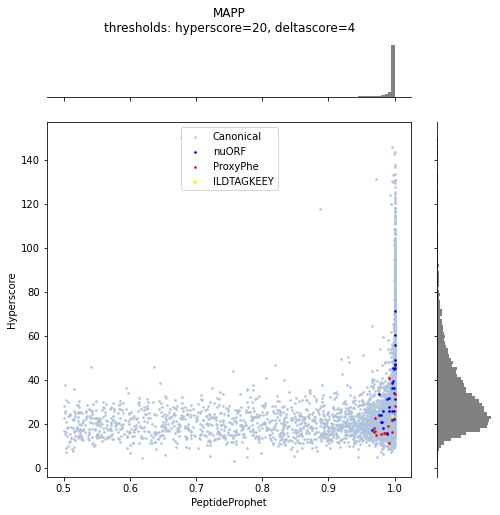

In [38]:
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3, width_ratios=[3,3,1], height_ratios=[1,3,3])
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(
    data2plot_canonical['PeptideProphet'], 
    data2plot_canonical['Hyperscore'], 
    s=10, c='lightsteelblue', marker='.', label='Canonical'
)
ax_main.scatter(
    data2plot_nuorf['PeptideProphet'], 
    data2plot_nuorf['Hyperscore'], 
    s=10, c='blue', marker='.', label='nuORF'
)
ax_main.scatter(
    data2plot_proxy['PeptideProphet'], 
    data2plot_proxy['Hyperscore'], 
    s=10, c='red', marker='.', label='ProxyPhe'
)
ax_main.scatter(
    data2plot_heavy['PeptideProphet'], 
    data2plot_heavy['Hyperscore'], 
    s=20, c='yellow', marker='+', label='ILDTAGKEEY'
)

#ax_main.axvline(thr_delta, c='black', linestyle='dashed', alpha=0.5)
#ax_main.axhline(thr_hs, c='black', linestyle='dashed', alpha=0.5)

ax_main.set(xlabel='PeptideProphet', ylabel='Hyperscore')
ax_main.legend(loc='upper center')

ax_xDist.hist(data2plot['PeptideProphet'], bins=100, align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_xDist.xaxis.set_tick_params(labelbottom=False)
ax_xDist.yaxis.set_tick_params(labelleft=False)
ax_xDist.set_yticks([])
ax_xDist.spines["right"].set_visible(False)
ax_xDist.spines["top"].set_visible(False)
ax_xDist.spines["left"].set_visible(False)

ax_xDist.set_title(experiment + '\nthresholds: hyperscore={}, deltascore={}'.format(thr_hs, thr_delta), pad=10)

ax_yDist.hist(data2plot['Hyperscore'], bins=100, orientation='horizontal', align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_yDist.xaxis.set_tick_params(labelbottom=False)
ax_yDist.yaxis.set_tick_params(labelleft=False)
ax_yDist.set_xticks([])
ax_yDist.spines["right"].set_visible(False)
ax_yDist.spines["top"].set_visible(False)
ax_yDist.spines["bottom"].set_visible(False)

plt.savefig('output/' + experiment + '.MSFragger.hyperscore_PeptideProphet.int.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig('output/' + experiment + '.MSFragger.hyperscore_PeptideProphet.int.pdf', dpi=600, facecolor='white', bbox_inches='tight')

plt.show()

In [39]:
name_sort = {'Canonical': 0, 'nuORF': 1, 'ProxyPhe': 2}
data2plot['NameSort'] = data2plot['Category'].map(name_sort)
data2plot = data2plot.sort_values(by=['NameSort'])

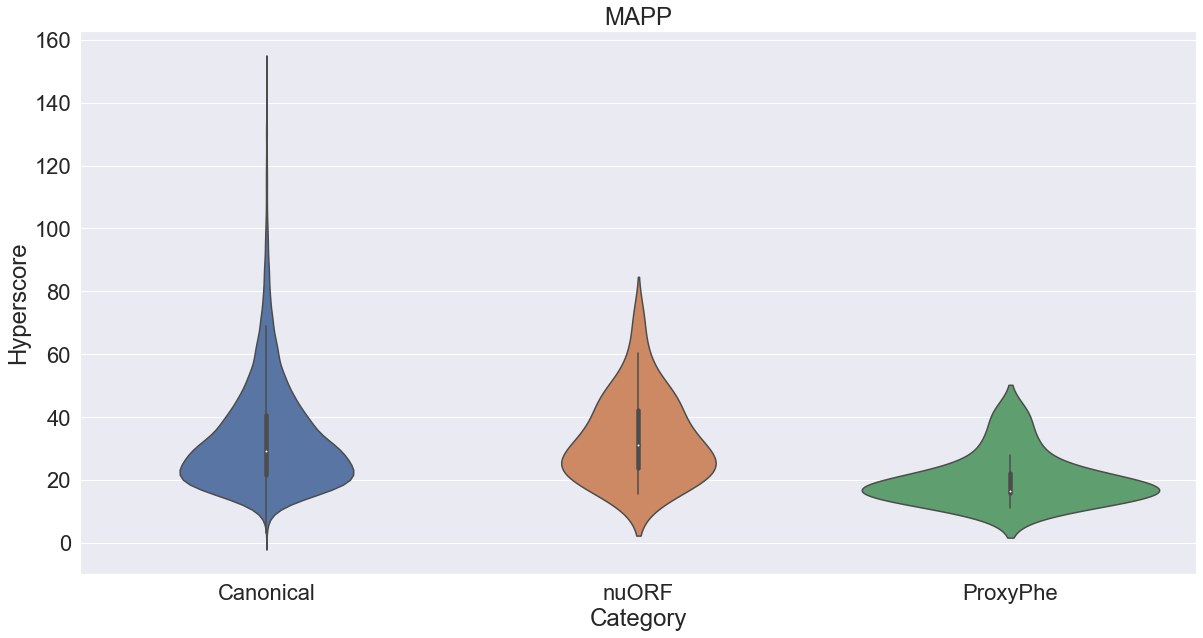

In [40]:
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)

p = sns.violinplot(data=data2plot, x='Category', y='Hyperscore')
p.set_xlabel("Category")
p.set_ylabel("Hyperscore")
title = p.axes.set_title(experiment)

p.figure.savefig('output/' + experiment + '.CategoryHyperscore.png', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')
p.figure.savefig('output/' + experiment + '.CategoryHyperscore.pdf', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')

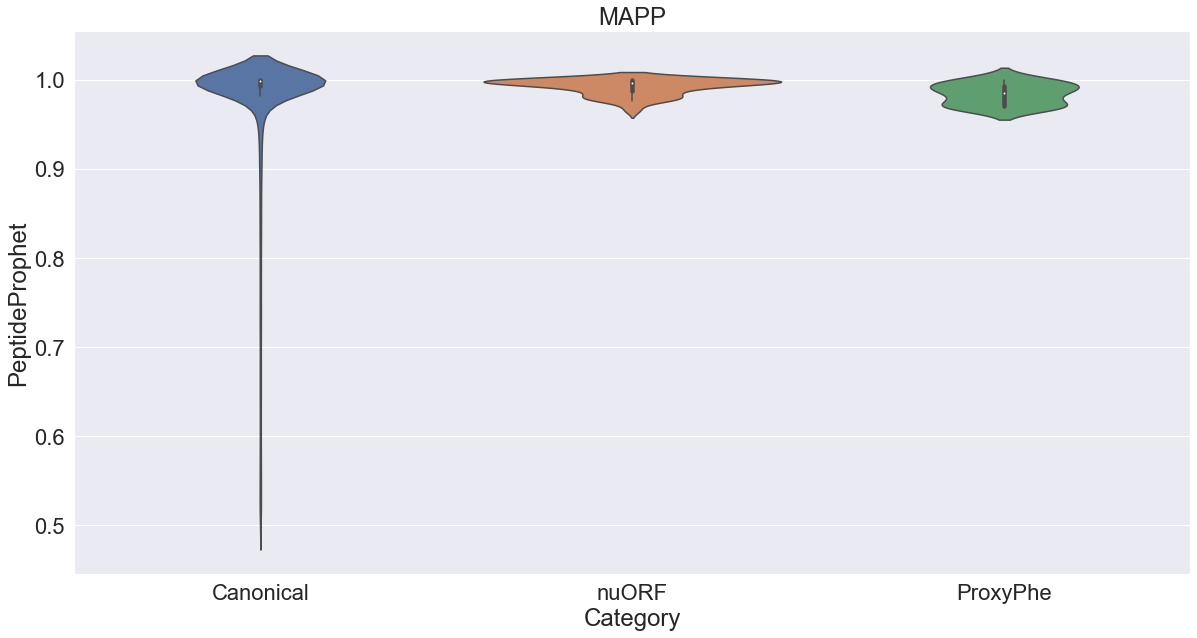

In [41]:
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)

p = sns.violinplot(data=data2plot, x='Category', y='PeptideProphet')
p.set_xlabel("Category")
p.set_ylabel("PeptideProphet")
title = p.axes.set_title(experiment)

p.figure.savefig('output/' + experiment + '.CategoryPeptideProphet.png', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')
p.figure.savefig('output/' + experiment + '.CategoryPeptideProphet.pdf', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')

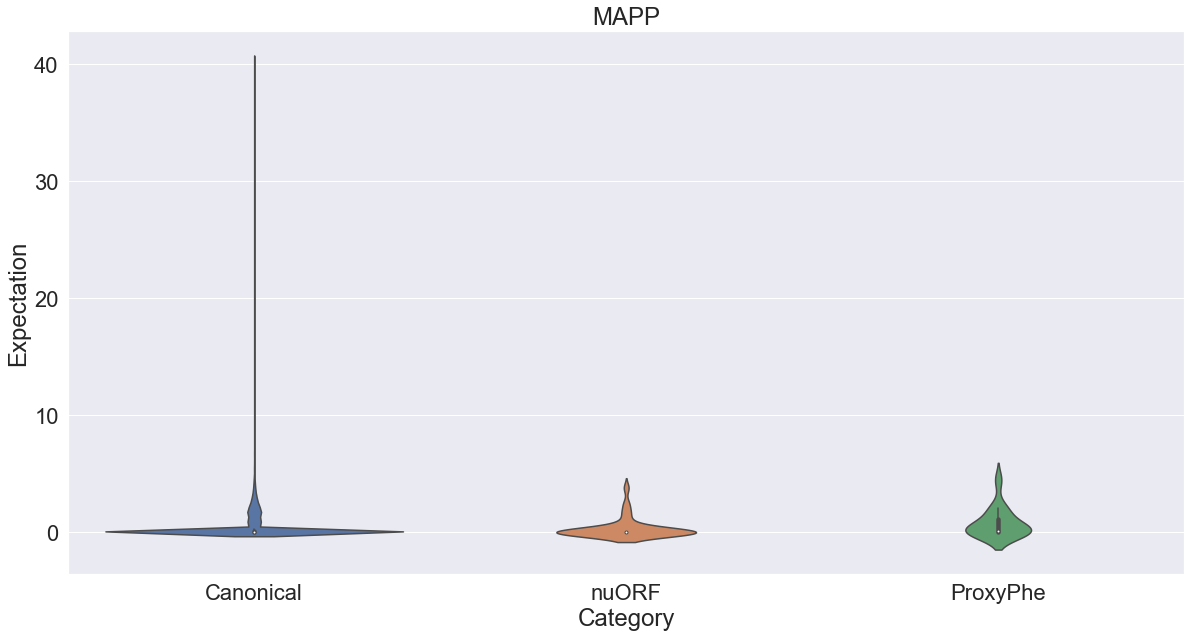

In [42]:
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)

p = sns.violinplot(data=data2plot, x='Category', y='Expectation')
p.set_xlabel("Category")
p.set_ylabel("Expectation")
title = p.axes.set_title(experiment)

p.figure.savefig('output/' + experiment + '.CategoryPeptideProphet.png', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')
p.figure.savefig('output/' + experiment + '.CategoryPeptideProphet.pdf', dpi=600, facecolor='white', transparent=False, bbox_inches='tight')

In [43]:
################### EXAMPLE ###################

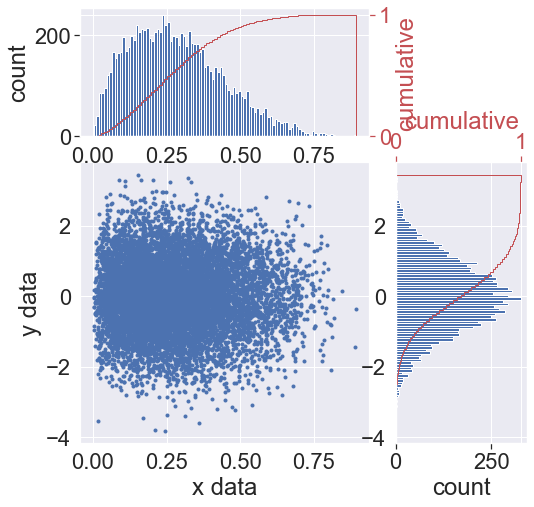

In [44]:
x = np.random.beta(2,5,size=int(1e4))
y = np.random.randn(int(1e4))

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
ax_main.scatter(x,y,marker='.')
ax_main.set(xlabel="x data", ylabel="y data")

ax_xDist.hist(x,bins=100,align='mid')
ax_xDist.set(ylabel='count')
ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative',color='r')

ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid')
ax_yDist.set(xlabel='count')
ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(y,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid',orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative',color='r')

plt.show()

In [45]:
###############################

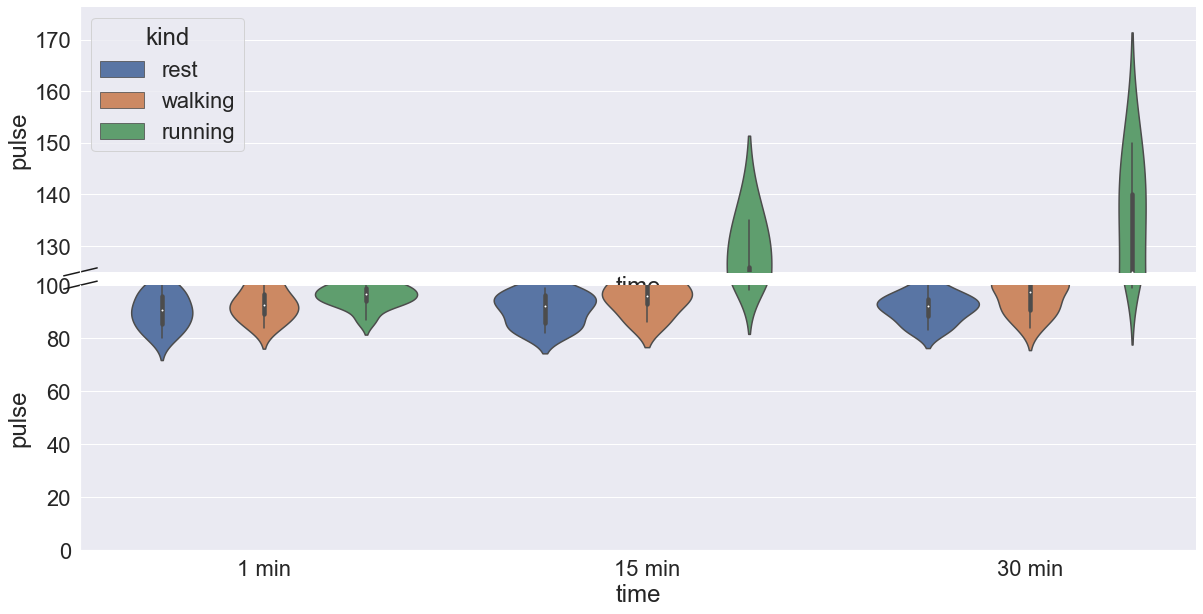

In [46]:
# If you want to draw on a subplot, you cannot use catplot, which is a figure-level function. Instead, you need to use violinplot directly. Also, if you want two different y-scales, you cannot use sharey=True when you create your subplots.

# The rest is pretty much copied/pasted from matplotlib's broken axes tutorial

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
exercise = sns.load_dataset("exercise")
f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.05})
sns.violinplot(x="time", y="pulse", hue="kind",data=exercise, ax=ax_top)
sns.violinplot(x="time", y="pulse", hue="kind",data=exercise, ax=ax_bottom)
ax_top.set_ylim(bottom=125)   # those limits are fake
ax_bottom.set_ylim(0,100)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

#remove one of the legend
ax_bottom.legend_.remove()
plt.show()


In [47]:
###############################

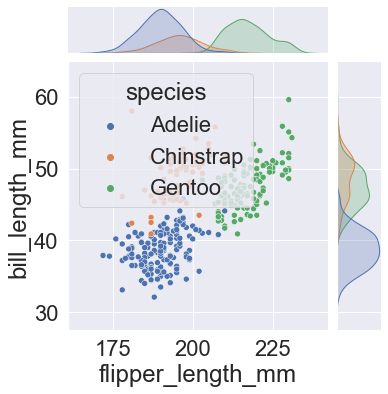

In [48]:
# JOINT PLOT
penguins = sns.load_dataset("penguins")
p = sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")